<a href="https://colab.research.google.com/github/AbdelnasserMostafa/-myproject/blob/master/TensorFlow_Programs_and_tutorials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Convolutional Neural Networks
# =================================


import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [ ]:
# Inputs and Outputs
# We are just going to create a session. Your x and y_are just going to be a placeholders that 
# basically just indicate the type of input you want in your CNN and the type of output. For each
# of these placeholders, you have to specify the type and the shape

tf.reset_default_graph() 
sess = tf.InteractiveSession()
x = tf.placeholder("float", shape = [None, 28,28,1]) #shape in CNNs is always None x height x width x color channels
y_ = tf.placeholder("float", shape = [None, 10]) #shape is always None x number of classes


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
# Network Architecutre
# Now that we have our placeholders, we just have to specify the network architecture. Basically, the main point we have to
# remember is that all of the filters (weights) and biases are tensorflow variables.
# Let's create our filer and bias for the first laryer

W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))#shape is filter x filter x input channels x output channels
b_conv1 = tf.Variable(tf.constant(.1, shape = [32])) #shape of the bias just has to match output channels of the filter

In [ ]:
# Now that we have our filter and our bias, we can call our first conv layer. The 3 arguments you have to specify are the input
# (which is where our placeholder comes into play), the filter (we just created the variable for that). the stride, and padding

print(x)
print (W_conv1)
h_conv1 = tf.nn.conv2d(input=x, filter=W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1
h_conv1 = tf.nn.relu(h_conv1)
h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')


Tensor("Placeholder:0", shape=(?, 28, 28, 1), dtype=float32)
<tf.Variable 'Variable:0' shape=(5, 5, 1, 32) dtype=float32_ref>


In [ ]:
# This just defines some methods to make the function calls a little nicer

def conv2d(x, W):
  return tf.nn.conv2d(input=x, filter=W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [ ]:
# Now we just complete the network

# Second Conv and Pool Layers
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(.1, shape = [64]))
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

# First Fully Connected Layer
W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(.1, shape = [1024]))
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

#Dropout Layer
keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#Second Fully Connected Layer
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(.1, shape = [10]))

#Final Layer
y = tf.matmul(h_fc1_drop, W_fc2) + b_fc2


In [ ]:
# Now let's formulate our loss function

crossEntropyLoss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_, logits = y))

# Now we need to use an Optimizer to minimize the function
trainStep = tf.train.AdamOptimizer().minimize(crossEntropyLoss)

In [ ]:
# The following are statement that help with calculating accuracy

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [ ]:
# The following line gets initializes all the variables we've declared earlier

sess.run(tf.global_variables_initializer())

In [ ]:
# The following code will allow us to visualize our training with Tensorboard

tf.summary.scalar('Cross_Enropy_Loss', crossEntropyLoss)
tf.summary.scalar('Accuracy', accuracy)
merged = tf.summary.merge_all()
logdir = "tensorboard/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
writer = tf.summary.FileWriter(logdir, sess.graph)

(1, 784)
Tensor("Reshape_1:0", shape=(1, 28, 28, 1), dtype=float32)


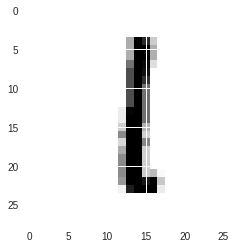

In [ ]:
b = mnist.train.next_batch(1)
print(b[0].shape) #b[0] contains the image
image = tf.reshape(b[0], [-1,28,28,1])
print(image)

my_img = image.eval() #here is your image Tensor
my_i = my_img.squeeze()
plt.imshow(my_i, cmap='gray_r')
plt.show()

In [ ]:
# Training

batchSize = 50
for i in range(1000):
    batch = mnist.train.next_batch(batchSize)
    trainingInputs = batch[0].reshape([batchSize,28,28,1])
    trainingLabels = batch[1]
    
    if i%10 == 0:
        summary = sess.run(merged, {x: trainingInputs, y_: trainingLabels, keep_prob: 1.0})
        writer.add_summary(summary, i)
        
    if i%100 == 0:
        trainAccuracy = accuracy.eval(session=sess, feed_dict={x:trainingInputs, y_: trainingLabels, keep_prob: 1.0})
        print ("step %d, training accuracy %g"%(i, trainAccuracy)) 
        trainStep.run(session=sess, feed_dict={x: trainingInputs, y_: trainingLabels, keep_prob: 0.5})

ValueError: ignored

In [ ]:
# Testing

testInputs = mnist.test.images.reshape([-1, 28, 28, 1])
testLabels = mnist.test.labels
acc = accuracy.eval(feed_dict = {x: testInputs, y_: testLabels, keep_prob: 1.0})
print("testing accuracy: {}".format(acc))

ValueError: ignored